# What are the most demanded skills for the top 3 most popular data roles?

## Methodology

1- Clean-up skill column

2- Calculate skill count based on job_title_short

3 -Plot final findings

In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

Filter Data for the United States


In [4]:
df_USA = df[df['job_country'] == 'United States']


Explode skills

In [7]:
df_skills = df_USA.explode('job_skills')

df_skills[['job_title_short', 'job_skills']]

,job_title_short,job_skills
0,Senior Data Engineer,None
3,Data Engineer,python
3,Data Engineer,c++
3,Data Engineer,java
3,Data Engineer,matlab
...,...,...
785692,Data Scientist,r
785703,Data Analyst,None
785705,Data Analyst,sql
785705,Data Analyst,python


In [16]:
df_skills_count = df_skills.groupby(['job_title_short', 'job_skills']).size()
df_skills_count = df_skills_count.reset_index(name = 'skill_count')

df_skills_count.sort_values(by = 'skill_count', ascending= False, inplace= True)

df_skills_count


,job_title_short,job_skills,skill_count
886,Data Scientist,python,42379
472,Data Analyst,sql,34452
921,Data Scientist,sql,30034
351,Data Analyst,excel,27519
890,Data Scientist,r,26022
...,...,...,...
1313,Senior Data Engineer,asp.net core,1
228,Cloud Engineer,ms access,1
1020,Machine Learning Engineer,graphql,1
1582,Senior Data Scientist,mariadb,1


Create List of Top 3 Roles


In [ ]:
job_titles =  df['job_title_short'].value_counts().head(3).index.to_list()

job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

Plot Skill Counts

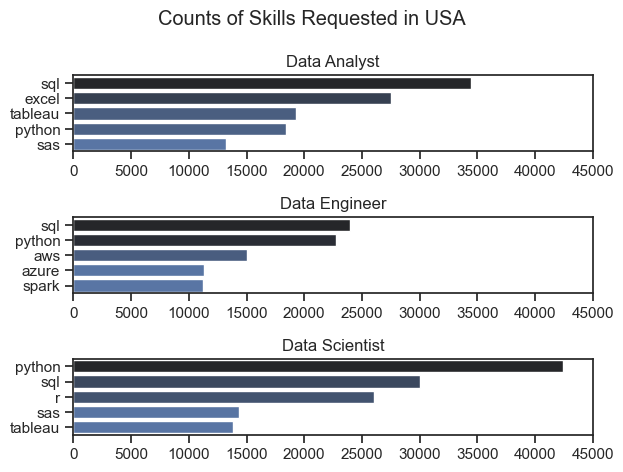

In [39]:
fig, ax =plt.subplots(3,1)

sns.set_theme(style= 'ticks')

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    sns.barplot(data= df_plot, x='skill_count', y = 'job_skills', ax= ax[i], hue='skill_count', palette='dark:b_r', legend= False)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].set_title(job_title)
    ax[i].set_xlim(0,45000)


fig.suptitle('Counts of Skills Requested in USA')
fig.tight_layout()
plt.show()